In [4]:
#CELL 1: Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
#CELL 2: Load BOTH Datasets
red = pd.read_csv('/content/winequality-red.csv', sep=';')
white = pd.read_csv('/content/winequality-white.csv', sep=';')


In [7]:
#CELL 3: Add Target Column
red['wine_type'] = 0      # red wine
white['wine_type'] = 1   # white wine


In [8]:
#CELL 4: Merge Datasets
data = pd.concat([red, white], axis=0)
data.reset_index(drop=True, inplace=True)

data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          0  
4      9.4        5          0

In [9]:
#CELL 5: Dataset Inspection
print("Shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())


Shape: (6497, 13)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [10]:
#CELL 6: Features & Target
X = data.drop('wine_type', axis=1)
y = data['wine_type']


In [11]:
#CELL 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
#CELL 8: Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5197, 12)
Test size: (1300, 12)


# PART 2:**training_and_finetuning**

In [13]:
#CELL 1: Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt

CELL 2: Model Justification
Logistic Regression is selected for binary classification of wine type due to its strong theoretical foundation, efficiency on numerical datasets, and widespread usage in wine classification research. The model supports hyperparameter fine-tuning through regularization.

In [14]:
#CELL 3: Initial Training
log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000
)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [15]:
#CELL 4: Initial Evaluation
y_pred = log_reg.predict(X_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred))


Initial Accuracy: 0.9953846153846154


In [16]:
#CELL 5: Fine-Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    LogisticRegression(
        solver='lbfgs',
        max_iter=1000
    ),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [17]:
#CELL 6: Best Model
best_model = grid.best_estimator_
print("Best C value:", grid.best_params_)


Best C value: {'C': 10}


In [18]:
#CELL 7: Final Evaluation
final_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, final_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, final_pred))


Final Accuracy: 0.9969230769230769

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



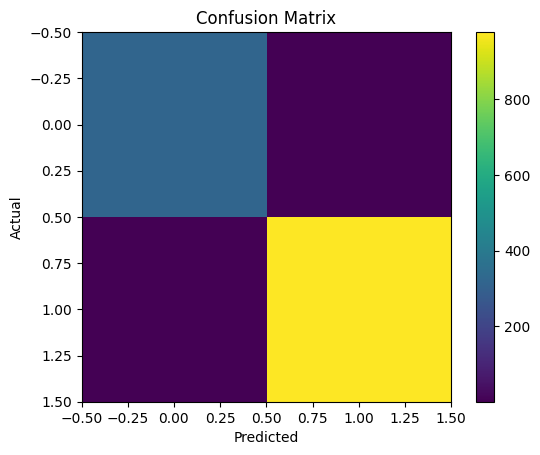

In [19]:
#CELL 8: Confusion Matrix
cm = confusion_matrix(y_test, final_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
#CELL 9: Save Model
joblib.dump(best_model, 'logistic_model.ipynb')


['logistic_model.ipynb']

In [24]:
from google.colab import files
files.download('logistic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>